In [18]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import emcee


In [19]:
#Define our model
def my_model(lam,center,height,width):
    return height * (width/2.)**2 / ((lam - center)**2 + (width/2.)**2)

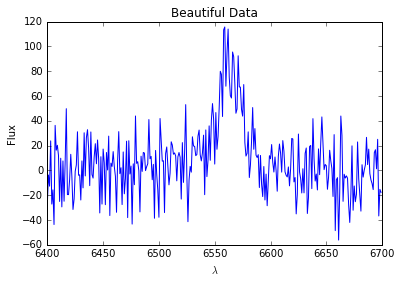

In [29]:
#Set up our fake dataset
my_lam = np.arange(6400,6700,1)#Angstroms
NOISE = 20.0
my_data = my_model(my_lam,6563,100,20) + np.random.normal(0, NOISE,len(my_lam))
my_sigmas = np.zeros(len(my_lam)) + NOISE
plt.plot(my_lam,my_data)
plt.xlabel(r'$\lambda$')
plt.ylabel('Flux')
plt.title('Beautiful Data')
plt.show()

In [30]:
#Let's make a final METRIC, Log Likelihood
def metric_log_likelihood(theta,lam,data,sigmas):
    center, height, width = theta
    return -0.5*(np.sum((data-my_model(lam,center,height,width))**2/sigmas**2 + np.log(sigmas**2)))

In [31]:
#Run "emcee"
ndim, nwalkers = 3, 100
p0 = [6560,90,5]
pos = [p0 + 1e-1*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, metric_log_likelihood, args=(my_lam, my_data, my_sigmas))
sampler.run_mcmc(pos, 500)


(array([[ 6562.5497984 ,    92.74819873,    18.72085478],
        [ 6562.7914669 ,    84.50396914,    22.5086326 ],
        [ 6563.93973642,    86.28591759,    19.23708066],
        [ 6563.43598736,    78.64062543,    28.52788832],
        [ 6562.5391568 ,    99.1272184 ,    20.08217024],
        [ 6561.90120684,    86.99470091,    18.33210582],
        [ 6562.32256553,    86.11159851,    18.73111185],
        [ 6562.75815171,    90.84044479,    20.95497896],
        [ 6562.51858189,    96.4832656 ,    21.36157597],
        [ 6562.33515182,    76.72028162,    23.546644  ],
        [ 6562.01702401,   107.26947811,    16.47048127],
        [ 6562.52321946,    89.54235766,    22.76828709],
        [ 6562.472076  ,    94.97585625,   -19.34409166],
        [ 6561.99147918,    93.24709586,    21.37833551],
        [ 6564.23396659,    93.72030358,    19.33226067],
        [ 6562.2429258 ,    97.88230274,    17.95548147],
        [ 6563.5632611 ,    85.74011067,    23.90341319],
        [ 6563

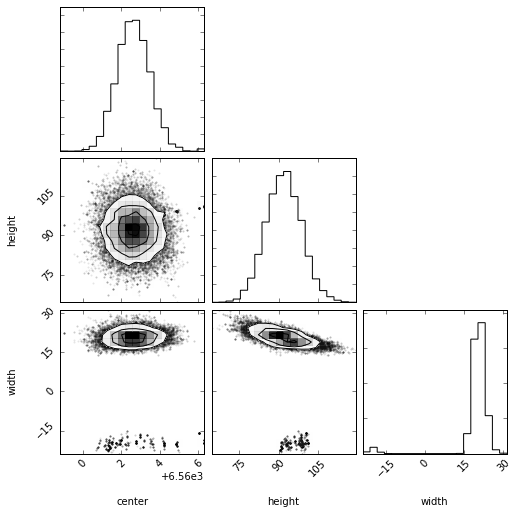

In [32]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
import corner
corner.corner(samples, labels=["center", "height", "width"])
plt.show()

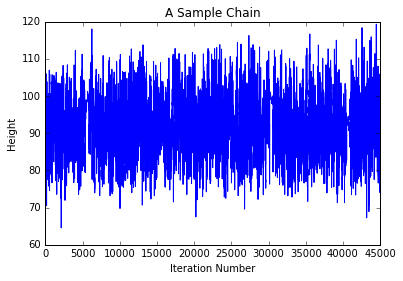

In [33]:
plt.plot(samples[:,1])
plt.xlabel('Iteration Number')
plt.ylabel('Height')
plt.title('A Sample Chain')
plt.show()

#Plot the other Chains


In [ ]:
#Chatting about Percentiles